In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [83]:
FilePath = os.path.join(os.getcwd(), 'Windows_Data/dataset_4f.csv')
dataset = pd.read_csv(FilePath)

In [84]:
dataset_no_dups = dataset.drop_duplicates(subset=None, keep=False)
Set = dataset_no_dups.drop(dataset_no_dups[(dataset_no_dups.label == 0) & (dataset_no_dups.max_smv < 17)].index)
X = Set[['mean_smv', 'max_smv', 'min_smv', 'duration']].values
y = Set[['label']].values
print(Set.loc[dataset['label'] == 1].describe())
print(Set.loc[dataset['label'] == 0].describe())

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=1)
X_train_resample, y_train_resample = over.fit_resample(X_train, y_train)
X_train_resample, y_train_resample = under.fit_resample(X_train, y_train)

          mean_smv      max_smv      min_smv     duration   label
count  1870.000000  1870.000000  1870.000000  1870.000000  1870.0
mean     10.033300    25.652472     3.059850    14.412834     1.0
std       0.214833     2.796419     1.475822    72.491306     0.0
min       9.339711    16.886193     0.302170  -362.000000     1.0
25%       9.881906    23.719808     1.890238   -31.750000     1.0
50%      10.022019    25.769089     2.986808    17.000000     1.0
75%      10.178270    27.555061     4.046217    53.000000     1.0
max      10.828897    32.885551     7.907462   432.000000     1.0
           mean_smv       max_smv       min_smv      duration    label
count  32151.000000  32151.000000  32151.000000  32151.000000  32151.0
mean      10.537224     22.464480      2.777710    -10.489409      0.0
std        0.931833      2.728021      1.783888    378.240231      0.0
min        7.068501     17.000608      0.030987   -993.000000      0.0
25%       10.155082     20.439339      0.993152   -

In [97]:
resample_fall = pd.DataFrame(np.squeeze(X_train_resample[np.squeeze(np.argwhere(y_train_resample == 1))]), 
                                        columns=['mean_smv', 'max_smv','min_smv','duration'])
resample_normal = pd.DataFrame(np.squeeze(X_train_resample[np.squeeze(np.argwhere(y_train_resample == 0))]), 
                                        columns=['mean_smv', 'max_smv','min_smv','duration'])
print(resample_fall.describe())
print(resample_normal.describe())

          mean_smv      max_smv      min_smv     duration
count  1399.000000  1399.000000  1399.000000  1399.000000
mean     10.033844    25.693738     3.081709    13.478914
std       0.215159     2.806266     1.492094    71.686006
min       9.494756    16.886193     0.302170  -362.000000
25%       9.880409    23.747148     1.891512   -32.000000
50%      10.021617    25.849936     3.010502    17.000000
75%      10.178681    27.607718     4.080228    52.000000
max      10.828897    32.885551     7.907462   432.000000
          mean_smv      max_smv      min_smv     duration
count  1399.000000  1399.000000  1399.000000  1399.000000
mean     10.493031    22.573072     2.695265   -10.278771
std       0.974724     2.704941     1.791265   365.313189
min       7.273706    17.016048     0.053061  -928.000000
25%      10.125417    20.644739     0.846907  -252.000000
50%      10.453557    22.468519     2.902470   -20.000000
75%      10.782455    24.419413     4.079153   224.000000
max      15.14

In [102]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=500)
clf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=500)

Accuracy on resampled training set: 0.9821300929235168
Accuracy on original training set: 0.9635900450715266
Accuracy on testing set: 0.9600282153773807
--------------------------------------------------
Precision score on testing set: 0.5849546044098574
Recall score on testing set: 0.9575371549893843
F1 score on testing set: 0.7262479871175522
--------------------------------------------------


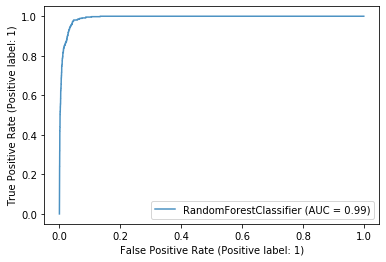

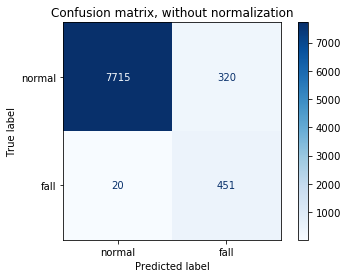

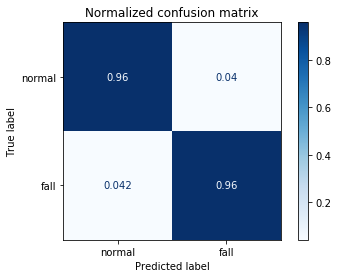

In [103]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

print('Accuracy on resampled training set: {}'.format(clf.score(X_train_resample, y_train_resample)))
print('Accuracy on original training set: {}'.format(clf.score(X_train, y_train)))
print('Accuracy on testing set: {}'.format(clf.score(X_test, y_test)))
print('-'*50)
y_pred = clf.predict(X_test)
print('Precision score on testing set: {}'.format(precision_score(y_test, y_pred)))
print('Recall score on testing set: {}'.format(recall_score(y_test, y_pred)))
print('F1 score on testing set: {}'.format(f1_score(y_test, y_pred)))
print('-'*50)
# Plot ROC curve 
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Plot nonnormalized / normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels= ['normal', 'fall'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    plt.show()